<a href="https://colab.research.google.com/github/adas754/Basic-Deep-Learning-Practical-implementation/blob/main/transfer_learning_feature_extraction(data_augmentation)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [9]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit_generator(
        train_generator,
        epochs=5,
        validation_data=validation_generator)

<ipython-input-11-05308efff8f8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
625/625 [==============================] - 169s 259ms/step - loss: 0.3062 - accuracy: 0.8692 - val_loss: 0.2255 - val_accuracy: 0.9032
Epoch 2/5
625/625 [==============================] - 157s 251ms/step - loss: 0.2381 - accuracy: 0.8976 - val_loss: 0.2017 - val_accuracy: 0.9122
Epoch 3/5
625/625 [==============================] - 157s 251ms/step - loss: 0.2222 - accuracy: 0.9060 - val_loss: 0.1981 - val_accuracy: 0.9170
Epoch 4/5
625/625 [==============================] - 167s 267ms/step - loss: 0.2091 - accuracy: 0.9128 - val_loss: 0.1926 - val_accuracy: 0.9188
Epoch 5/5
625/625 [==============================] - 157s 252ms/step - loss: 0.1968 - accuracy: 0.9169 - val_loss: 0.1976 - val_accuracy: 0.9136


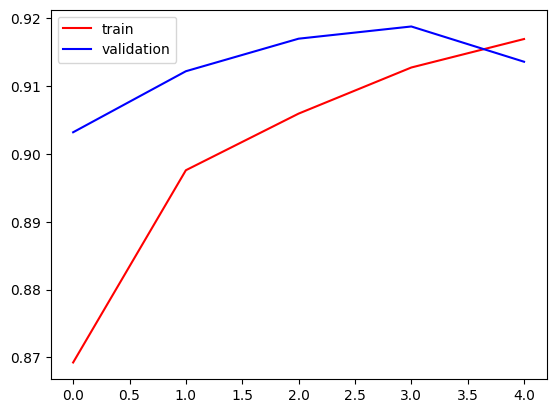

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

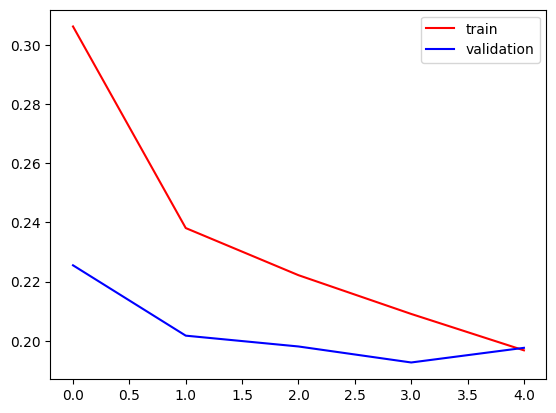

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()